#### Problem Statement
* Extract OHLCV data from Binance
* Plot Candlestick patterns for "1d" for last 1 year
* Exponential Moving Average (EMA) of 200 days on the candlestick chart

#### Flow of Analysis
* Import Relevant Libraries
* Load data from Binance Exchange for Bitcoin(BNB/BTC)/USDT
* Clean OHLCV data
* Method for Simple Moving Average(SMA/EMA) for 7 days, 20 days, 200 days
* Plot Line Graph for Price vs SMA7, SMA20, SMA200

In [1]:
! pip install ccxt
#CryptoCurrency eXchange Trading library
#run line of code/script in (linux)terminal and not in python (python environment)
#pip: package that connects our env to PyPi global repository

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.4/291.4 KB 21.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
thinc 8.0.15 requires typing-extensions<4.0.0.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.2.0 which is incompatible.
spacy 3.2.4 requires typing-extensions<4.0.0.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.2.0 which is incompatible.
gcsfs 2022.2.0 requires fsspec==2022.02.0, 

In [2]:
! pip install mpl_finance

In [3]:
import pandas as pd 
import ccxt
import matplotlib.pyplot as plt  
%matplotlib inline               
#magical function which renders the graph along with kaggle notebook
#from ccxt.base import exchange
import datetime                 
#libraries to plot candlesticks                                
from mpl_finance import candlestick_ohlc     
import matplotlib.dates as mpdates
import plotly.graph_objects as go

/opt/conda/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [4]:
exchange = ccxt.binance() 
#will have necessary backend ready for connecting to BINANCE portal
#initializing the connector


#### API Application Programming Interface:
one program(kaggle notebook) interacts with other program(Binance portal)

Service providing the info puts some limitation on the data to be shared as it costs 
for Computation and Processing at Binance's end
* we provide the start and end date
* for every request, we create a batch i.e 20 records/request or 20 days/year


In [5]:
exchange.milliseconds() 
#Current timestamp
#View the Human Readable Date using https://www.epochconverter.com/
#standard nomenclature in computer science

1651867510610

In [6]:
if exchange.has['fetchOHLCV']:
    #conditional loop to check exchange has fetchOHLCV
    #get info from Binance :opening, high,low,closing price
    ticker = "BTC/USDT"
    #Binance recognizes the crytocurrency
    since = exchange.parse8601("2020-11-01T00:00:00Z") 
    #Unix epoch: number of seconds that have elapsed since January 1, 1970
    all_orders = []  #blank list to be used for appending
    while since < exchange.milliseconds():  
        #start time is less than current time
        #exchange.milliseconds(): converts the current time 
        limit = 20  # 20 days of data will be extracted from 1st of Nov
        ohlcv = exchange.fetch_ohlcv(symbol = ticker, since = since, timeframe = "1d", limit = limit)
        #class exchange has method fetch_ohlcv
        if len(ohlcv) > 0:
            since = ohlcv[len(ohlcv)-1][0] + 1 
            #from 20 days of data,extract first element from the last request i.e milliseconds
            #and increment by 1 i.e now 21st Nov
            all_orders += ohlcv
            #appending the list received from Binance to our empty list
        else:
            break

In [7]:
print(f"First 5 records: \n{all_orders[0:5]}")
#we have data for below number of days
print(f"\nTotal records: {len(all_orders)}")
print(f"\nLast record is: {all_orders[-1]}")

First 5 records: 
[[1604188800000, 13791.0, 13895.0, 13603.0, 13761.5, 36285.648526], [1604275200000, 13761.49, 13830.0, 13195.05, 13549.37, 64566.421908], [1604361600000, 13549.63, 14066.11, 13284.99, 14023.53, 74115.630787], [1604448000000, 14023.53, 14259.0, 13525.0, 14144.01, 93016.988262], [1604534400000, 14144.01, 15750.0, 14093.56, 15590.02, 143741.522673]]

Total records: 552

Last record is: [1651795200000, 36552.97, 36675.63, 35258.0, 35936.46, 65411.6437]


In [8]:
def cleanData(ohlcv_list):
    temp = []
    for i in ohlcv_list:
        timestamp_with_ms = i[0]
        dt = datetime.datetime.fromtimestamp(timestamp_with_ms / 1000)
        formatted_time = dt.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
        #converts a datetime object containing current date and time to string formats
        #extracting upto final 3 values to avoid high accuracy date
        i[0] = dt
        temp.append(i)
    return temp

In [9]:
data = cleanData(ohlcv_list = all_orders)

In [10]:
ohlcv_df = pd.DataFrame(data, columns = ["date","open_price","high_price","low_price","close_price","volume_traded"])

In [11]:
ohlcv_df.tail(n=6)

,date,open_price,high_price,low_price,close_price,volume_traded
546,2022-05-01,37630.80,38675.00,37386.38,38468.35,38812.24104
547,2022-05-02,38468.35,39167.34,38052.00,38525.16,53200.92628
548,2022-05-03,38525.16,38651.51,37517.80,37728.95,40316.45358
549,2022-05-04,37728.95,40023.77,37670.00,39690.00,62574.61736
550,2022-05-05,39690.00,39845.51,35571.90,36552.97,88722.43355
551,2022-05-06,36552.97,36675.63,35258.00,35936.46,65411.64370


#### Data Exploration

In [12]:
ohlcv_df.iloc[523,:]

date             2022-04-08 00:00:00
open_price                   43444.2
high_price                  43970.62
low_price                   42107.14
close_price                 42252.01
volume_traded            42375.04203
Name: 523, dtype: object

In [13]:
ohlcv_df.loc[254,["date","low_price"]]

date         2021-07-13 00:00:00
low_price               32202.25
Name: 254, dtype: object

In [14]:
ohlcv_df.describe()

,open_price,high_price,low_price,close_price,volume_traded
count,552.000000,552.000000,552.000000,552.000000,552.000000
mean,42832.267953,44078.562264,41420.772645,42872.598080,65888.186398
std,11980.499648,12190.263083,11688.635035,11920.164453,36187.235242
min,13549.630000,13830.000000,13195.050000,13549.370000,15805.447180
25%,36650.877500,37850.000000,34738.750000,36653.080000,42142.814248
50%,42843.325000,43935.000000,41791.875000,42843.325000,56467.929431
75%,50449.230000,51889.725000,48681.215000,50449.237500,81386.941388
max,67525.820000,69000.000000,66222.400000,67525.830000,354347.243161


* 25 percentile means 25% of data has values less tha 36650 as open value
* 75 percentile means 75% of datapoints in our dataset are less than 50449 as open value
* 50 percentile is Median
* Rolling Average : what is the average based on specific range of dates
* TimeSeries data: Data collected over a period of time(current use case)
* EWMA and SMA: 
    * Exponentially Weighted Moving Average(recent timeseries data has higher weightage in the calculation of average as compared to previous data) 
    * Simple Moving Average(looks for 100 days of data without giving priority to latest or old days, no weightage to recency of data)

In [15]:
#Calculating EWMA on the open prices; for 200 days
ohlcv_df["ewm200"]=ohlcv_df.open_price.ewm(span=200,min_periods = 0,adjust = False,ignore_na = False).mean()

In [16]:
ohlcv_df[-3:]

,date,open_price,high_price,low_price,close_price,volume_traded,ewm200
549,2022-05-04,37728.95,40023.77,37670.0,39690.00,62574.61736,43691.117674
550,2022-05-05,39690.00,39845.51,35571.9,36552.97,88722.43355,43651.305557
551,2022-05-06,36552.97,36675.63,35258.0,35936.46,65411.64370,43580.675353


#### Plotting Line Graph

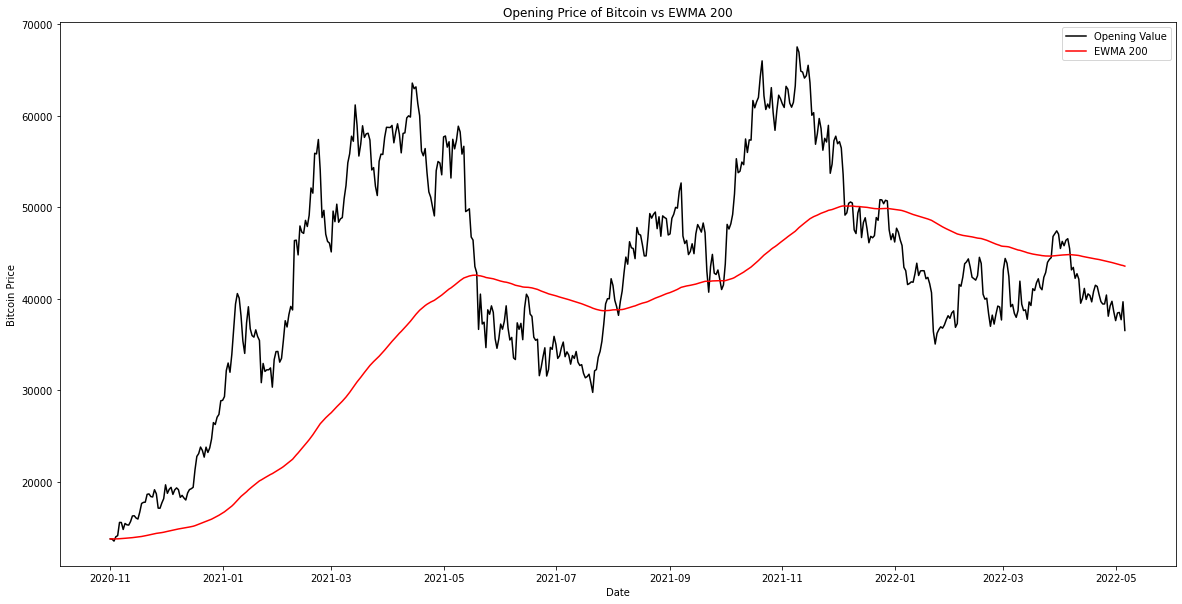

In [17]:
plt.figure(figsize = (20,10))
plt.plot(ohlcv_df.date, ohlcv_df.open_price, color = "black", label = "Opening Value")
plt.plot(ohlcv_df.date, ohlcv_df.ewm200, color = "red", label = "EWMA 200")
plt.title("Opening Price of Bitcoin vs EWMA 200")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.show()

#### Plotting Candlesticks

In [18]:
cs_df = ohlcv_df.copy()

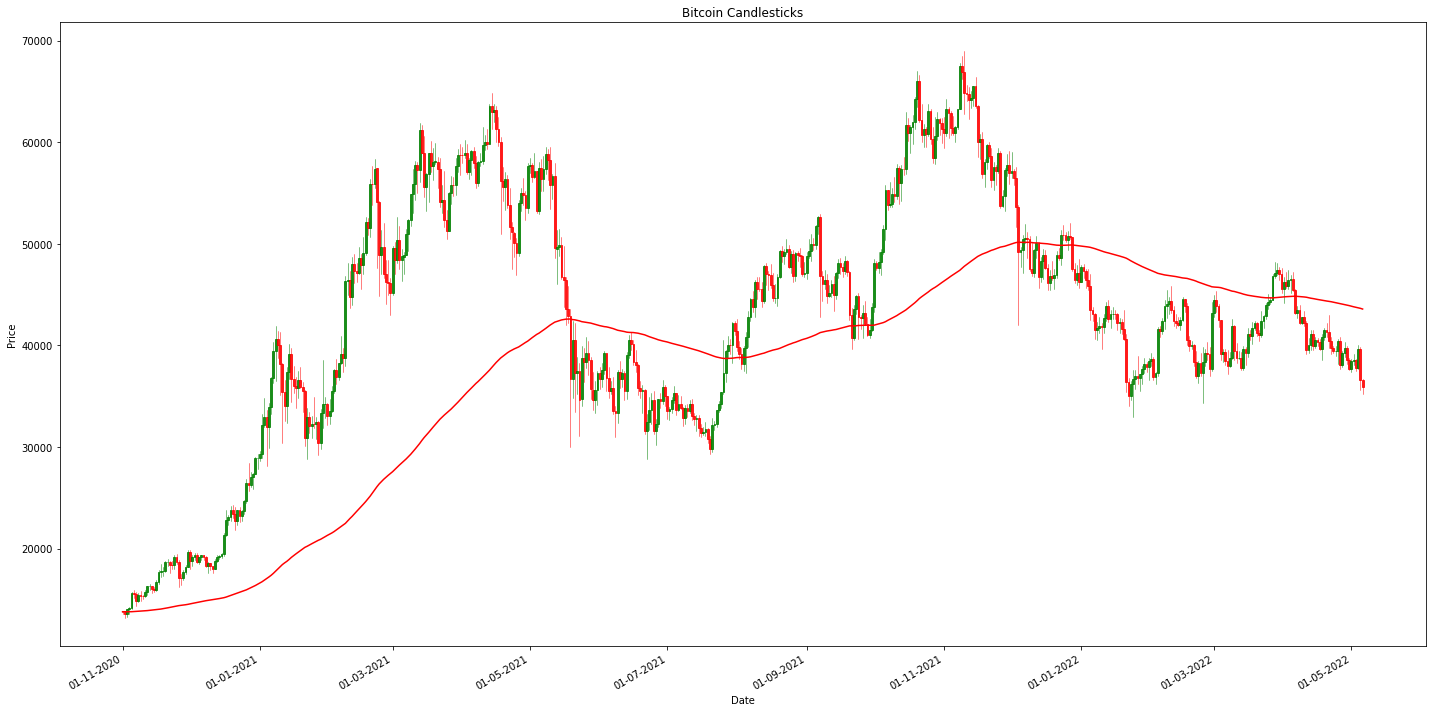

In [19]:
try:
    cs_df["date"] = cs_df["date"].map(mpdates.date2num)
except:
    pass
#re-execution of date conversion will throw an error so we use try-except
#try: try line of code : transform/(.map is a in-built python method to)apply transformation across all elements of a list
#date is transformed to numeric value required by matpotlib to plot candlesticks
#if a code fails it comes to except: don't do anything just move on

#Creating Subplots
fig,ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)

#Plotting the data
candlestick_ohlc(ax,
                 cs_df[["date","open_price","high_price",
                        "low_price","close_price","volume_traded"]].values,
                 width = 0.8,colorup="green",colordown="red",alpha = 0.8)
#Plotting EWMA
plt.plot(ohlcv_df.date, ohlcv_df.ewm200, color = "red", label = "EWMA 200")
#Setting labels
ax.set_xlabel("Date")
ax.set_ylabel("Price")

#Setting Title
plt.title("Bitcoin Candlesticks")

#Formatting Date
date_format = mpdates.DateFormatter("%d-%m-%Y")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
#Show the plot
plt.show()

#### Plotly : Interactive Graphs

In [20]:
fig = go.Figure(data = [go.Candlestick(x = cs_df["date"],
                                       open = cs_df["open_price"],
                                       high = cs_df["high_price"],
                                       low = cs_df["low_price"],
                                       close = cs_df["close_price"])])
#Line plot with Plotly
fig.add_trace(go.Scatter(x = cs_df["date"], y = cs_df["ewm200"],
                        mode = "lines",name = "ewm200",
                        line = dict(color = "teal")))
#remove grid
fig.update_layout(title = "Bitcoin Candlesticks", plot_bgcolor="white")
#Show the plot
fig.show()